In [52]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

In [53]:
df=pd.read_csv("Health_insurance_cost.xlsx - Health_insurance_cost.csv")

In [54]:
df.head()

,age,gender,BMI,Children,smoking_status,location,health_insurance_price
0,19.0,female,NaN,0,yes,southwest,16884.92400
1,18.0,male,33.770,1,no,southeast,1725.55230
2,28.0,male,33.000,3,no,southeast,4449.46200
3,33.0,male,22.705,0,no,northwest,21984.47061
4,32.0,male,28.880,0,no,northwest,3866.85520


In [55]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   age                     1310 non-null   float64
 1   gender                  1338 non-null   object 
 2   BMI                     1315 non-null   float64
 3   Children                1338 non-null   int64  
 4   smoking_status          1338 non-null   object 
 5   location                1338 non-null   object 
 6   health_insurance_price  1336 non-null   float64
dtypes: float64(3), int64(1), object(3)
memory usage: 73.3+ KB


In [56]:
df.columns

Index(['age', 'gender', 'BMI', 'Children', 'smoking_status', 'location',
       'health_insurance_price'],
      dtype='object')

In [57]:
df.isnull().mean()*100

age                       2.092676
gender                    0.000000
BMI                       1.718984
Children                  0.000000
smoking_status            0.000000
location                  0.000000
health_insurance_price    0.149477
dtype: float64

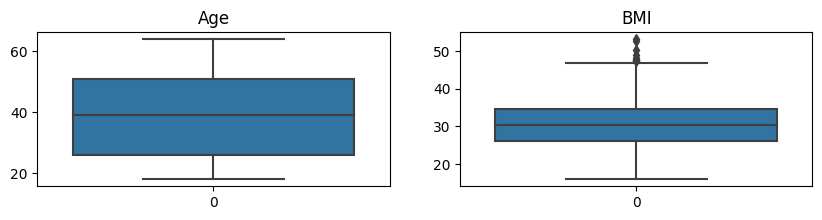

In [58]:
#handling NULL values

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 2))

sns.boxplot(data=df['age'], ax=axes[0])
axes[0].set_title("Age")

sns.boxplot(data=df['BMI'], ax=axes[1])
axes[1].set_title("BMI")

plt.show()


In [59]:
#By the above box plot we can understand that Age does not have any outlier so we can replace with mean of column
df['age'].fillna(df['age'].mean(),inplace=True)

In [60]:
#By the above box plot we can understand that BMI  have  outlier so we  replace with Meadian of column
df['BMI'].fillna(df['BMI'].median(),inplace=True)

In [61]:
# Deleting the rows which has null values , has the less than 0.1 percent in dataset
df.dropna(inplace=True)

In [62]:
df.describe()

,age,BMI,Children,health_insurance_price
count,1336.000000,1336.000000,1336.000000,1336.000000
mean,39.164416,30.625543,1.094311,13268.527719
std,13.915466,6.052347,1.206138,12112.797724
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.315000,0.000000,4744.325050
50%,39.166412,30.305000,1.000000,9382.033000
75%,51.000000,34.430000,2.000000,16604.302645
max,64.000000,53.130000,5.000000,63770.428010


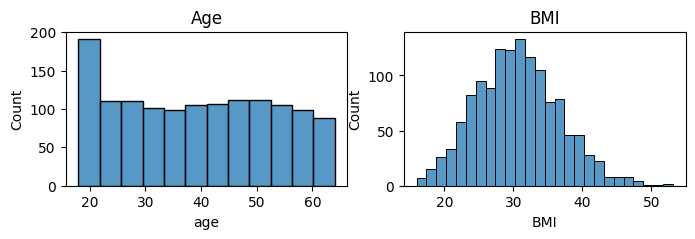

In [63]:

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(8, 2))

sns.histplot(data=df['age'], ax=axes[0])
axes[0].set_title("Age")

sns.histplot(data=df['BMI'], ax=axes[1])
axes[1].set_title("BMI")

plt.show()

In [13]:
# By the above graphs we can understand that persons has age 20 are more than any other age 
# In BMI the peak or no of people where there BMI lies betweeen 25 to 38 

In [64]:
cat_columns=[i for i in df.columns if df[i].dtype=='O']
cat_columns

['gender', 'smoking_status', 'location']

Text(0.5, 1.0, 'location')

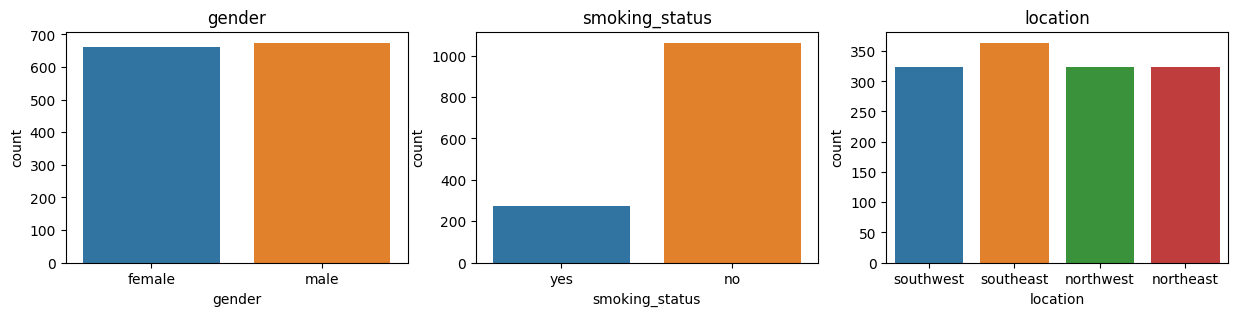

In [65]:

# Create subplots
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15,3))

# Plot countplot for 'gender'
sns.countplot(data=df,x='gender', ax=axes[0])
axes[0].set_title("gender")

# Plot countplot for 'smoking_status' on the second subplot
sns.countplot(data=df,x='smoking_status', ax=axes[1])
axes[1].set_title("smoking_status")

sns.countplot(data=df,x='location', ax=axes[2])
axes[2].set_title("location")

# If you want a different variable for the third subplot, use it here
# Example: sns.countplot(data=df['another_variable'], ax=axes[2])


In [16]:
# people does not smokes has high than the people who somkes 
# people from all the location has  almost same  count 

Text(0.5, 1.0, 'health_insurance_price')

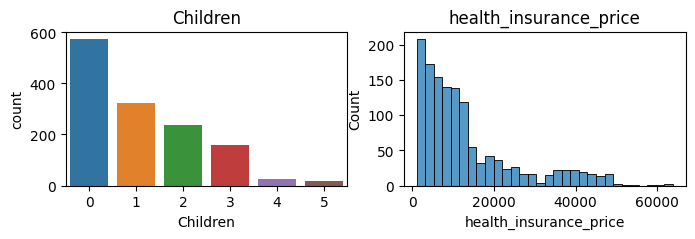

In [66]:
    fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(8, 2))

sns.countplot(data=df,x='Children', ax=axes[0])
axes[0].set_title("Children")

sns.histplot(data=df['health_insurance_price'], ax=axes[1])
axes[1].set_title("health_insurance_price")


In [18]:
# By the above graph , it is clear that persons with 0 children has more insurance counts than any other

In [67]:
df.head()

,age,gender,BMI,Children,smoking_status,location,health_insurance_price
0,19.0,female,30.305,0,yes,southwest,16884.92400
1,18.0,male,33.770,1,no,southeast,1725.55230
2,28.0,male,33.000,3,no,southeast,4449.46200
3,33.0,male,22.705,0,no,northwest,21984.47061
4,32.0,male,28.880,0,no,northwest,3866.85520


# Bivariate Analysis

<Axes: xlabel='health_insurance_price', ylabel='Count'>

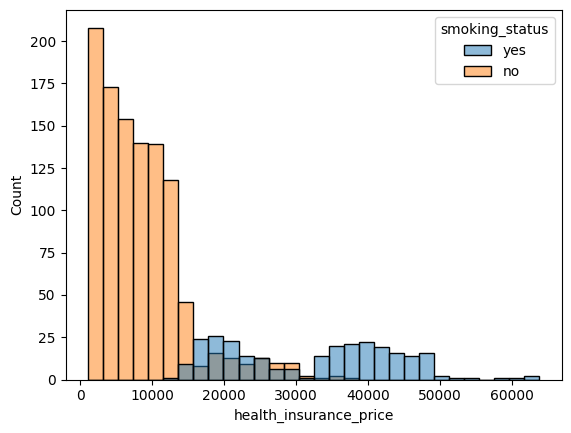

In [69]:
sns.histplot(data=df,x='health_insurance_price',hue='smoking_status')

<Axes: xlabel='BMI', ylabel='health_insurance_price'>

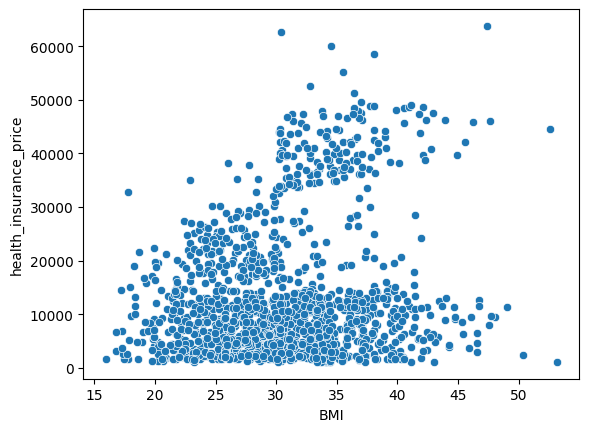

In [70]:
sns.scatterplot(data=df,x='BMI',y='health_insurance_price')

<Axes: xlabel='age', ylabel='health_insurance_price'>

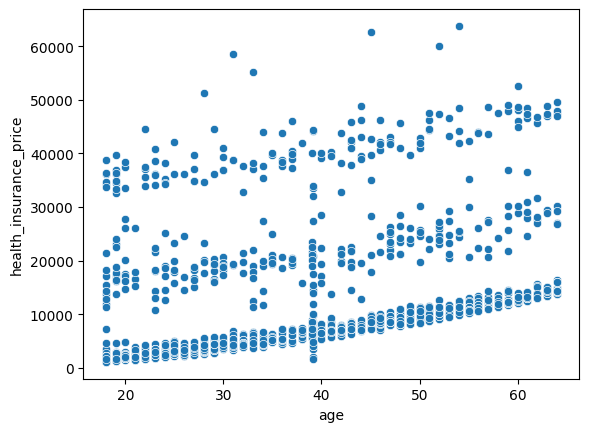

In [71]:
sns.scatterplot(data=df,x='age',y='health_insurance_price')

C:\Users\HOME\anaconda3\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


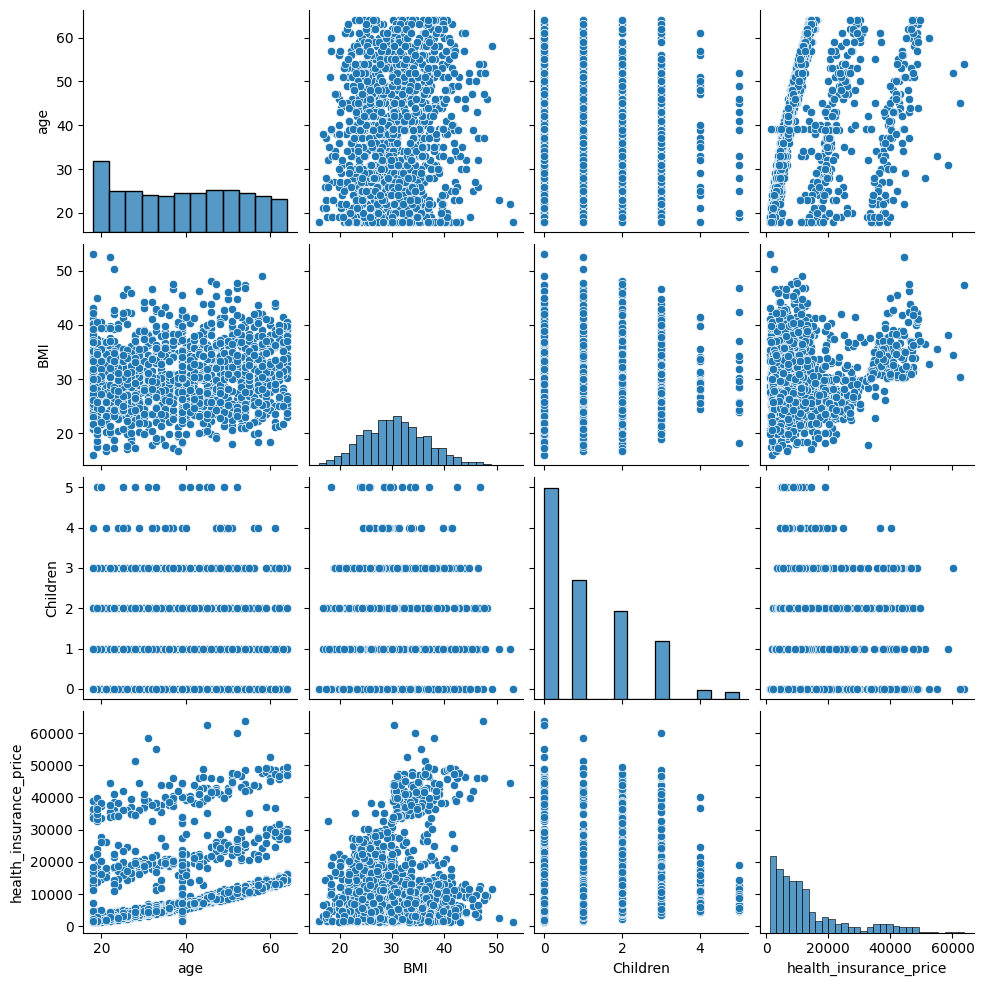

In [74]:
sns.pairplot(data=df)

In [75]:
# as per the heatmap we can understand that smoking status effects the health insurance.

In [76]:
df['gender']=df['gender'].replace({'male':1,'female':0})
df['smoking_status']=df['smoking_status'].replace({'yes':1,'no':0})

<Axes: >

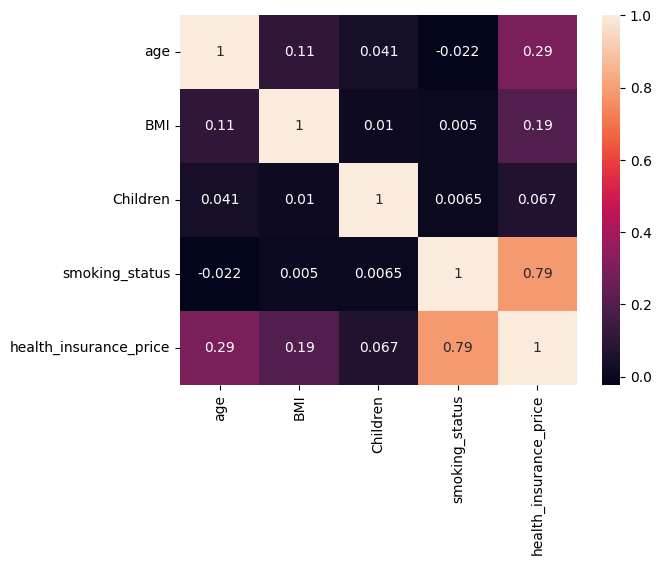

In [77]:
data=df[['age','BMI','Children','smoking_status','health_insurance_price']].corr()
sns.heatmap(data=data,annot=True)

In [78]:
df.head()

,age,gender,BMI,Children,smoking_status,location,health_insurance_price
0,19.0,0,30.305,0,1,southwest,16884.92400
1,18.0,1,33.770,1,0,southeast,1725.55230
2,28.0,1,33.000,3,0,southeast,4449.46200
3,33.0,1,22.705,0,0,northwest,21984.47061
4,32.0,1,28.880,0,0,northwest,3866.85520


In [79]:
df['location'].unique()

array(['southwest', 'southeast', 'northwest', 'northeast'], dtype=object)

In [80]:
df1=pd.get_dummies(df,['location'],drop_first=True).astype('int')
df1

,age,gender,BMI,Children,smoking_status,health_insurance_price,location_northwest,location_southeast,location_southwest
0,19,0,30,0,1,16884,0,0,1
1,18,1,33,1,0,1725,0,1,0
2,28,1,33,3,0,4449,0,1,0
3,33,1,22,0,0,21984,1,0,0
4,32,1,28,0,0,3866,1,0,0
...,...,...,...,...,...,...,...,...,...
1333,50,1,30,3,0,10600,1,0,0
1334,18,0,31,0,0,2205,0,0,0
1335,18,0,36,0,0,1629,0,1,0
1336,21,0,25,0,0,2007,0,0,1


In [81]:
df1=df1.iloc[:,6:]
df1

,location_northwest,location_southeast,location_southwest
0,0,0,1
1,0,1,0
2,0,1,0
3,1,0,0
4,1,0,0
...,...,...,...
1333,1,0,0
1334,0,0,0
1335,0,1,0
1336,0,0,1


In [82]:
df2=pd.concat([df,df1],axis=1)

df2['age']=df2['age'].astype('int')
df2.drop('location',axis=1,inplace=True)
df2.head()

,age,gender,BMI,Children,smoking_status,health_insurance_price,location_northwest,location_southeast,location_southwest
0,19,0,30.305,0,1,16884.92400,0,0,1
1,18,1,33.770,1,0,1725.55230,0,1,0
2,28,1,33.000,3,0,4449.46200,0,1,0
3,33,1,22.705,0,0,21984.47061,1,0,0
4,32,1,28.880,0,0,3866.85520,1,0,0


In [83]:
X = df2.loc[:, :]
X.drop('health_insurance_price',axis=1,inplace=True)
y = df2['health_insurance_price']

In [84]:
X.head()

,age,gender,BMI,Children,smoking_status,location_northwest,location_southeast,location_southwest
0,19,0,30.305,0,1,0,0,1
1,18,1,33.770,1,0,0,1,0
2,28,1,33.000,3,0,0,1,0
3,33,1,22.705,0,0,1,0,0
4,32,1,28.880,0,0,1,0,0


In [85]:
y

0       16884.92400
1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
           ...     
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
1337    29141.36030
Name: health_insurance_price, Length: 1336, dtype: float64

In [86]:
# Train Test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

from sklearn.preprocessing  import StandardScaler
scalar=StandardScaler()
X_train=scalar.fit_transform(X_train)
X_test=scalar.transform(X_test)


In [87]:
# Import necessary libraries
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

linear = LinearRegression()
linear.fit(X_train, y_train)
print(linear.coef_)
print(linear.intercept_)

[3558.43947206  -99.12188078 1985.39844388  577.93621218 9182.02891051
 -193.94553961 -600.27444003 -406.07661647]
12883.647051114234


In [88]:
scalar.get_params()

{'copy': True, 'with_mean': True, 'with_std': True}

In [89]:
y_pred_test = linear.predict(X_test)
y_pred_train = linear.predict(X_train)

<Axes: ylabel='health_insurance_price'>

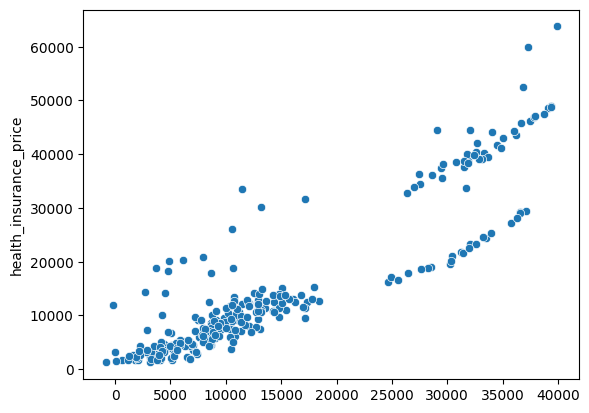

In [90]:
sns.scatterplot(x=y_pred_test,y=y_test)

C:\Users\HOME\anaconda3\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


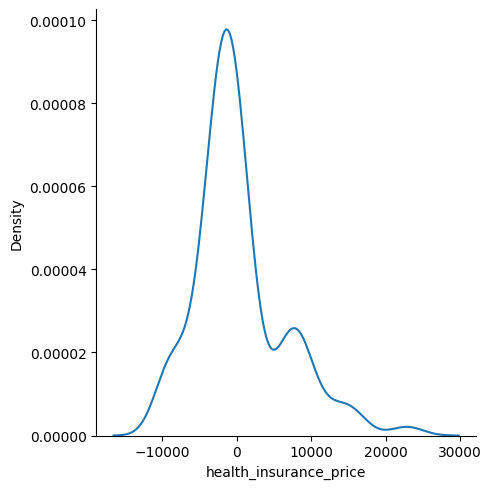

In [91]:
residuals=y_test-y_pred_test

sns.displot(residuals,kind='kde')

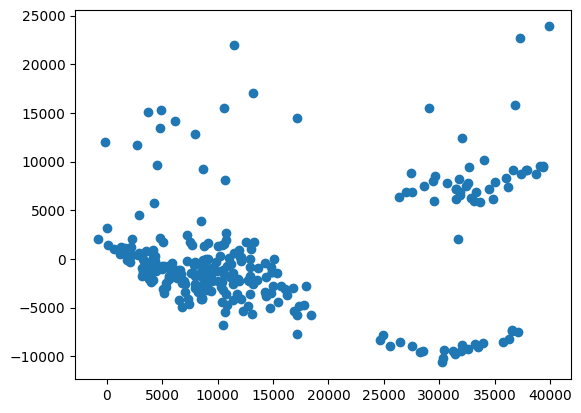

In [92]:
plt.scatter(y_pred_test,residuals)

In [93]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

print(mean_absolute_error(y_test,y_pred_test))
print(mean_squared_error(y_test,y_pred_test))
print(np.sqrt(mean_squared_error(y_test,y_pred_test)))

4307.18093124649
36521920.29828432
6043.336851300308


In [94]:
from sklearn.metrics import r2_score
r2_score=r2_score(y_test,y_pred_test)
print(r2_score)

0.8021151369621959
